In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.4.0'

In [4]:
keras.__version__

'2.4.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
              ]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_train[0]

4

In [16]:
model = keras.models.Sequential()

In [18]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

OR

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]

In [25]:
hidden1.name

'dense_3'

In [27]:
model.get_layer('dense_3') is hidden1

True

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
weights

array([[-0.0272032 , -0.05287993,  0.03121032, ..., -0.0678722 ,
        -0.05028924,  0.00482262],
       [ 0.03558836, -0.01123567,  0.01618519, ..., -0.00302476,
         0.04359331, -0.00841721],
       [-0.0695014 ,  0.04726382, -0.06071041, ...,  0.06933242,
         0.0463253 ,  0.04874728],
       ...,
       [ 0.0221533 ,  0.01410872,  0.02220749, ...,  0.05169678,
        -0.02975791,  0.0292526 ],
       [-0.03822171, -0.05164234, -0.00396234, ...,  0.03270239,
        -0.01396544, -0.04400531],
       [ 0.05159663,  0.03870992, -0.04012758, ...,  0.00972661,
         0.06302232,  0.01753204]], dtype=float32)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
weights.shape

(784, 300)

In [33]:
biases.shape

(300,)

In [34]:
input_layer = model.layers[0]

In [35]:
input_layer.name

'flatten_1'

In [36]:
input_layer.get_weights()

[]

In [37]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.9647 - accuracy: 0.6973 - val_loss: 0.5035 - val_accuracy: 0.8354
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5057 - accuracy: 0.8246 - val_loss: 0.4608 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4546 - accuracy: 0.8417 - val_loss: 0.4188 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4211 - accuracy: 0.8530 - val_loss: 0.3899 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4004 - accuracy: 0.8599 - val_loss: 0.4154 - val_accuracy: 0.8498
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3871 - accuracy: 0.8639 - val_loss: 0.3656 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3672 - accuracy: 0.8708 - val_loss: 0.3576 - val_accuracy:

In [40]:
import pydot

In [41]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [42]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [44]:
history.history

{'loss': [0.702117919921875,
  0.4870314598083496,
  0.44387245178222656,
  0.4179142415523529,
  0.3972010612487793,
  0.3814561367034912,
  0.36603692173957825,
  0.35474738478660583,
  0.3438122570514679,
  0.3339284360408783,
  0.3255518078804016,
  0.31670674681663513,
  0.30861133337020874,
  0.3023715615272522,
  0.29541000723838806,
  0.2892765700817108,
  0.28317224979400635,
  0.2786669135093689,
  0.2721285820007324,
  0.26606717705726624,
  0.2619834244251251,
  0.25718721747398376,
  0.25377345085144043,
  0.24800683557987213,
  0.24290256202220917,
  0.23843981325626373,
  0.2344968467950821,
  0.23072345554828644,
  0.22652100026607513,
  0.22336162626743317],
 'accuracy': [0.7696181535720825,
  0.8301272988319397,
  0.8453817963600159,
  0.8533272743225098,
  0.8605636358261108,
  0.8655090928077698,
  0.871218204498291,
  0.8742727041244507,
  0.8790363669395447,
  0.8802545666694641,
  0.8835272789001465,
  0.887327253818512,
  0.8895090818405151,
  0.8916363716125488

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

(0.0, 1.0)

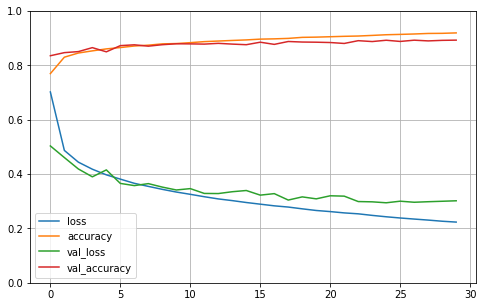

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [50]:
model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2188 - accuracy: 0.9212 - val_loss: 0.3064 - val_accuracy: 0.8862
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2159 - accuracy: 0.9227 - val_loss: 0.2948 - val_accuracy: 0.8938
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2110 - accuracy: 0.9246 - val_loss: 0.3070 - val_accuracy: 0.8896
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2089 - accuracy: 0.9248 - val_loss: 0.3437 - val_accuracy: 0.8748
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2049 - accuracy: 0.9264 - val_loss: 0.2991 - val_accuracy: 0.8928
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2023 - accuracy: 0.9269 - val_loss: 0.2979 - val_accuracy: 0.8908
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1982 - accuracy: 0.9280 - val_loss: 0.2980 - val_accuracy:

In [53]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.1276 - accuracy: 0.8556


[64.12757873535156, 0.8555999994277954]

In [54]:
X_new = X_test[:3]

In [62]:
y_proba = model.predict_proba(X_new)

/Users/kalyaniasthana/handsonml/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [63]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_pred = model.predict(X_new)

In [65]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [69]:
import numpy as np
np.array(class_names)[np.argmax(y_pred, axis=1)]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [70]:
y_new = y_test[:3]

In [71]:
y_new

array([9, 2, 1], dtype=uint8)

In [72]:
np.array(class_names)[y_new]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [74]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
housing = fetch_california_housing()

In [76]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [78]:
scaler = StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [81]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [82]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3530 - val_loss: 0.6209
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6097 - val_loss: 0.4915
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6452 - val_loss: 0.4830
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4469 - val_loss: 0.4483
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4281 - val_loss: 0.4404
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4138 - val_loss: 0.4761
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3910 - val_loss: 0.4228
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3847 - val_loss: 0.4142
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3816 - val_loss: 0.4095
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3761 - val_loss: 0.4047

In [83]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4150


In [84]:
X_new = X_test[:3]

In [85]:
y_pred = model.predict(X_new)

In [86]:
y_pred

array([[0.9423231],
       [1.060964 ],
       [1.010056 ]], dtype=float32)

In [87]:
y_test[:3]

array([1.022, 0.91 , 1.194])

In [88]:
from sklearn.metrics import accuracy_score

In [100]:
y_pred = np.concatenate(y_pred).ravel()

In [101]:
y_test_small = y_test[:3].astype(np.float32)
y_test_small

array([1.022, 0.91 , 1.194], dtype=float32)

In [104]:
from sklearn.metrics import mean_squared_error

In [105]:
mean_squared_error(y_pred, y_test_small)

0.020991303

Leaving Sequential API behind and using Functional API for building complex models

In [107]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [108]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [109]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [110]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [111]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.4587 - val_loss: 0.9329
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8502 - val_loss: 0.7184
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6752 - val_loss: 0.6512
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6344 - val_loss: 0.6150
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5934 - val_loss: 0.5910
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5914 - val_loss: 0.5706
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5674 - val_loss: 0.5561
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5367 - val_loss: 0.5422
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5399 - val_loss: 0.5307
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5134 - val_loss: 0.5234

In [112]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.5026


In [113]:
y_pred = model.predict((X_new_A, X_new_B))

In [114]:
X_new_A.shape, X_new_B.shape

((3, 5), (3, 6))

In [115]:
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [116]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [117]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20, 
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.4808 - main_output_loss: 1.3600 - aux_output_loss: 2.5677 - val_loss: 0.5892 - val_main_output_loss: 0.5214 - val_aux_output_loss: 1.1994
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5439 - main_output_loss: 0.4823 - aux_output_loss: 1.0980 - val_loss: 0.5429 - val_main_output_loss: 0.4957 - val_aux_output_loss: 0.9676
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5174 - main_output_loss: 0.4747 - aux_output_loss: 0.9018 - val_loss: 0.5069 - val_main_output_loss: 0.4687 - val_aux_output_loss: 0.8508
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4710 - main_output_loss: 0.4397 - aux_output_loss: 0.7531 - val_loss: 0.4896 - val_main_output_loss: 0.4576 - val_aux_output_loss: 0.7774
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4619 - main_output_loss: 0.4327 - aux_output_loss: 0.7246 - val_loss

In [118]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.4080 - main_output_loss: 0.3912 - aux_output_loss: 0.5591


In [119]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [120]:
y_pred_main

array([[0.98637366],
       [1.0851955 ],
       [1.333122  ]], dtype=float32)

In [121]:
y_pred_aux

array([[1.2688949],
       [0.5435996],
       [1.3702488]], dtype=float32)

Subclassing API

In [122]:
 import os

In [123]:
root_logdir = os.path.join(os.curdir, 'my_logs')

In [124]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [125]:
run_logdir = get_run_logdir()

In [126]:
run_logdir

'./my_logs/run_2021_01_01-11_27_12'

In [128]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [130]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20, 
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3546 - main_output_loss: 0.3396 - aux_output_loss: 0.4895 - val_loss: 0.3681 - val_main_output_loss: 0.3513 - val_aux_output_loss: 0.5196
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3544 - main_output_loss: 0.3395 - aux_output_loss: 0.4881 - val_loss: 0.3659 - val_main_output_loss: 0.3493 - val_aux_output_loss: 0.5153
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3516 - main_output_loss: 0.3370 - aux_output_loss: 0.4832 - val_loss: 0.3616 - val_main_output_loss: 0.3450 - val_aux_output_loss: 0.5102
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3499 - main_output_loss: 0.3355 - aux_output_loss: 0.4789 - val_loss: 0.3662 - val_main_output_loss: 0.3499 - val_aux_output_loss: 0.5135
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3473 - main_output_loss: 0.3334 - aux_output_loss: 0.4728 - val_loss

In [131]:
test_logdir = get_run_logdir()

In [132]:
writer = tf.summary.create_file_writer(test_logdir)

In [135]:
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar('my_scalar', np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2)
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image('my_images', images*step/1000, step=step)
        texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000)/48000*2*np.pi*step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

Fine tuning neural network hyperparameters

In [136]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [137]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [138]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.5525 - val_loss: 0.7188
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6816 - val_loss: 0.6346
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6414 - val_loss: 0.5959
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5564 - val_loss: 0.5654
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5420 - val_loss: 0.5570
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5304 - val_loss: 0.5247
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5067 - val_loss: 0.5261
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5115 - val_loss: 0.5112
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4991 - val_loss: 0.5006
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4690 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3674 - val_loss: 0.3805
Epoch 82/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3639 - val_loss: 0.3773
Epoch 83/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3632 - val_loss: 0.3773
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3510 - val_loss: 0.3769
Epoch 85/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3438 - val_loss: 0.3783
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3569 - val_loss: 0.3843
Epoch 87/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3497 - val_loss: 0.3740
Epoch 88/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3550 - val_loss: 0.3750
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3617 - val_loss: 0.3759
Epoch 90/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3652 - val_loss: 

In [139]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3941


In [140]:
y_pred = keras_reg.predict(X_new)

In [141]:
y_pred

array([1.0538442 , 1.1484078 , 0.92206717], dtype=float32)

In [142]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [143]:
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

In [144]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [145]:
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.6987 - val_loss: 2.5125
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.0647 - val_loss: 1.4285
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1917 - val_loss: 1.0529
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0139 - val_loss: 0.9131
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8930 - val_loss: 0.8531
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7975 - val_loss: 0.8201
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7846 - val_loss: 0.7971
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7955 - val_loss: 0.7781
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7228 - val_loss: 0.7617
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6800 - val_lo

242/242 [==============================] - 0s 1ms/step - loss: 0.4544 - val_loss: 0.4859
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4526 - val_loss: 0.4845
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4764 - val_loss: 0.4846
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4486 - val_loss: 0.4828
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4429 - val_loss: 0.4819
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4496 - val_loss: 0.4820
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4645 - val_loss: 0.4810
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4563 - val_loss: 0.4814
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4481 - val_loss: 0.4800
Epoch 90/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4762 - val_loss: 

Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4600 - val_loss: 0.4740
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4602 - val_loss: 0.4725
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4531 - val_loss: 0.4724
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4353 - val_loss: 0.4712
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4439 - val_loss: 0.4703
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4322 - val_loss: 0.4690
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4350 - val_loss: 0.4693
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4528 - val_loss: 0.4675
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4356 - val_loss: 0.4674
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4317

242/242 [==============================] - 0s 2ms/step - loss: 0.4924 - val_loss: 0.5059
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4768 - val_loss: 0.5044
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4842 - val_loss: 0.5032
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4818 - val_loss: 0.5016
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4643 - val_loss: 0.5004
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4691 - val_loss: 0.4990
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4661 - val_loss: 0.4981
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4717 - val_loss: 0.4967
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4980 - val_loss: 0.4960
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4619 - val_loss: 

Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6113 - val_loss: 0.6041
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6147 - val_loss: 0.5970
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5816 - val_loss: 0.5901
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5781 - val_loss: 0.5836
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5873 - val_loss: 0.5778
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5917 - val_loss: 0.5721
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5439 - val_loss: 0.5665
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5554 - val_loss: 0.5614
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5462 - val_loss: 0.5563
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5459

121/121 [==============================] - 0s 880us/step - loss: 0.4675
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 5.2443 - val_loss: 2.8227
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.5990 - val_loss: 1.5261
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5571 - val_loss: 1.0379
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0435 - val_loss: 0.8460
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8106 - val_loss: 0.7685
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7562 - val_loss: 0.7306
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7471 - val_loss: 0.7080
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7191 - val_loss: 0.6910
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6875 - val_loss: 0.6768
Epoch 10/100
242/24

Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4411 - val_loss: 0.4717
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4564 - val_loss: 0.4707
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4568 - val_loss: 0.4708
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4375 - val_loss: 0.4703
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4312 - val_loss: 0.4697
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4636 - val_loss: 0.4689
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4616 - val_loss: 0.4687
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4451 - val_loss: 0.4680
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4372 - val_loss: 0.4677
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4341

242/242 [==============================] - 0s 2ms/step - loss: 0.4770 - val_loss: 0.4866
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4457 - val_loss: 0.4854
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4430 - val_loss: 0.4842
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4706 - val_loss: 0.4831
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5005 - val_loss: 0.4821
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4683 - val_loss: 0.4811
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4707 - val_loss: 0.4801
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4692 - val_loss: 0.4791
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4580 - val_loss: 0.4782
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4678 - val_loss: 

Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5089 - val_loss: 0.5331
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5262 - val_loss: 0.5321
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5160 - val_loss: 0.5356
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5011 - val_loss: 0.5342
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4869 - val_loss: 0.5622
Epoch 44/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5117 - val_loss: 0.5437
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5317 - val_loss: 0.5562
Epoch 46/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5062 - val_loss: 0.5335
Epoch 47/100
121/121 [==============================] - 0s 1ms/step - loss: 0.8560
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.8671 - val_loss: 0.9797


242/242 [==============================] - 0s 2ms/step - loss: 0.4918 - val_loss: 0.5233
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5174 - val_loss: 0.5247
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5129 - val_loss: 0.5247
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4880 - val_loss: 0.5237
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5038 - val_loss: 0.5236
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5013 - val_loss: 0.5241
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5072 - val_loss: 0.5237
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4899 - val_loss: 0.5240
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.5232
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5137 - val_loss: 

121/121 [==============================] - 0s 921us/step - loss: 1.3249
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.0623 - val_loss: 0.7672
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7541 - val_loss: 0.6934
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6945 - val_loss: 0.6159
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6428 - val_loss: 0.5931
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6028 - val_loss: 0.5571
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5649 - val_loss: 0.5403
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5417 - val_loss: 0.5324
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5103 - val_loss: 0.5137
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4902 - val_loss: 0.5044
Epoch 10/100
242/24

242/242 [==============================] - 0s 2ms/step - loss: 0.3783 - val_loss: 0.3962
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3675 - val_loss: 0.3967
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3571 - val_loss: 0.3952
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3649 - val_loss: 0.3949
Epoch 84/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3533 - val_loss: 0.3947
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3659 - val_loss: 0.3932
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3671 - val_loss: 0.3931
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3927 - val_loss: 0.3992
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3690 - val_loss: 0.4018
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4065 - val_loss: 

Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3623 - val_loss: 0.4012
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3620 - val_loss: 0.3987
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3542 - val_loss: 0.4017
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3648 - val_loss: 0.3975
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3695 - val_loss: 0.3966
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3583 - val_loss: 0.3959
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3542 - val_loss: 0.3955
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3509 - val_loss: 0.3953
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3705 - val_loss: 0.3931
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3698

242/242 [==============================] - 0s 2ms/step - loss: 427905995322089565470064640.0000 - val_loss: 11184257980411049351252541440.0000
Epoch 11/100
121/121 [==============================] - 0s 985us/step - loss: 473503640324852515701853782016.0000
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.9074 - val_loss: 1.2812
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1339 - val_loss: 0.9406
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8803 - val_loss: 0.8070
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7811 - val_loss: 0.7472
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7440 - val_loss: 0.7137
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7028 - val_loss: 0.6904
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6662 - val_loss: 0.6713
Epoch 8/100
242/242 [===============

242/242 [==============================] - 0s 2ms/step - loss: 0.3560 - val_loss: 0.4043
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3495 - val_loss: 0.4032
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3800 - val_loss: 0.4023
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3673 - val_loss: 0.4029
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3722 - val_loss: 0.4031
Epoch 82/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3552 - val_loss: 0.4002
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3652 - val_loss: 0.3997
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3523 - val_loss: 0.3989
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3426 - val_loss: 0.3985
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3672 - val_loss: 

Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3782 - val_loss: 0.4121
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3743 - val_loss: 0.4111
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3520 - val_loss: 0.4096
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3811 - val_loss: 0.4085
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3831 - val_loss: 0.4083
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3737 - val_loss: 0.4075
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3779 - val_loss: 0.4056
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3711 - val_loss: 0.4052
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3796 - val_loss: 0.4049
Epoch 66/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3725

242/242 [==============================] - 0s 2ms/step - loss: 0.4074 - val_loss: 0.4459
Epoch 37/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4454 - val_loss: 0.4456
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4304 - val_loss: 0.4435
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4276 - val_loss: 0.4424
Epoch 40/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3960 - val_loss: 0.4407
Epoch 41/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4157 - val_loss: 0.4394
Epoch 42/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4092 - val_loss: 0.4389
Epoch 43/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4086 - val_loss: 0.4374
Epoch 44/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4134 - val_loss: 0.4374
Epoch 45/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4000 - val_loss: 

Epoch 16/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3717 - val_loss: 0.4761
Epoch 17/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3678 - val_loss: 0.4800
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3683 - val_loss: 0.4826
Epoch 19/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3853 - val_loss: 0.4932
Epoch 20/100
121/121 [==============================] - 0s 2ms/step - loss: 3.9840
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3602 - val_loss: 0.9971
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7105 - val_loss: 0.5058
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5018 - val_loss: 0.4738
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5204 - val_loss: 0.4740
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4417 - val_loss: 0.4547
Epoc

242/242 [==============================] - 0s 2ms/step - loss: 0.3137 - val_loss: 0.3414
Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3059 - val_loss: 0.3344
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3223 - val_loss: 0.3601
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3268 - val_loss: 0.3460
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3239 - val_loss: 0.3375
Epoch 80/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3046 - val_loss: 0.3407
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3113 - val_loss: 0.3421
Epoch 82/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3120 - val_loss: 0.3324
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3162 - val_loss: 0.3302
Epoch 84/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3126 - val_loss: 

Epoch 55/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2827 - val_loss: 0.3194
Epoch 56/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2796 - val_loss: 0.4131
Epoch 57/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2909 - val_loss: 0.3198
Epoch 58/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2886 - val_loss: 0.3170
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2924 - val_loss: 0.3119
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2778 - val_loss: 0.3237
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2768 - val_loss: 0.3169
Epoch 62/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2829 - val_loss: 0.3164
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2875 - val_loss: 0.3433
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2917

242/242 [==============================] - 1s 4ms/step - loss: 0.3432 - val_loss: 0.3745
Epoch 39/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3300 - val_loss: 0.3696
Epoch 40/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3534 - val_loss: 0.3929
Epoch 41/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3427 - val_loss: 0.3695
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3331 - val_loss: 0.4283
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3533 - val_loss: 0.3647
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3401 - val_loss: 0.3622
Epoch 45/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3490 - val_loss: 0.3653
Epoch 46/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3320 - val_loss: 0.3689
Epoch 47/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3377 - val_loss: 

Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3401 - val_loss: 0.3673
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3220 - val_loss: 0.3583
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3207 - val_loss: 0.3650
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3458 - val_loss: 0.3653
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3238 - val_loss: 0.3686
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3336 - val_loss: 0.3523
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3225 - val_loss: 0.3542
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3236 - val_loss: 0.3519
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3177 - val_loss: 0.3557
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3393

242/242 [==============================] - 0s 1ms/step - loss: 0.4448 - val_loss: 0.4604
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4383 - val_loss: 0.4608
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4292 - val_loss: 0.4552
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4184 - val_loss: 0.4495
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 0.4616
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4076 - val_loss: 0.4467
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4127 - val_loss: 0.4434
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4194 - val_loss: 0.4414
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4051 - val_loss: 0.4387
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4124 - val_loss: 

242/242 [==============================] - 1s 2ms/step - loss: 0.3271 - val_loss: 0.3680
Epoch 96/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3250 - val_loss: 0.3637
Epoch 97/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3300 - val_loss: 0.3695
Epoch 98/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3358 - val_loss: 0.3625
Epoch 99/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3219 - val_loss: 0.3663
Epoch 100/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3657
Epoch 1/100
242/242 [==============================] - 2s 5ms/step - loss: 1.9906 - val_loss: 0.6045
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.6674 - val_loss: 0.6122
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5367 - val_loss: 0.5374
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4731 - val_loss: 0.5042
Epoch 5/100
242

242/242 [==============================] - 1s 2ms/step - loss: 0.3752 - val_loss: 0.3874
Epoch 32/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3515 - val_loss: 0.3886
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3812 - val_loss: 0.3833
Epoch 34/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3569 - val_loss: 0.3857
Epoch 35/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3624 - val_loss: 0.3946
Epoch 36/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3538 - val_loss: 0.3822
Epoch 37/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3527 - val_loss: 0.3835
Epoch 38/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3398 - val_loss: 0.3731
Epoch 39/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3571 - val_loss: 0.3715
Epoch 40/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3503 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.4593 - val_loss: 0.4753
Epoch 27/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4306 - val_loss: 0.4721
Epoch 28/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4233 - val_loss: 0.4694
Epoch 29/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4477 - val_loss: 0.4666
Epoch 30/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4211 - val_loss: 0.4650
Epoch 31/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4421 - val_loss: 0.4627
Epoch 32/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4347 - val_loss: 0.4624
Epoch 33/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4297 - val_loss: 0.4614
Epoch 34/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4115 - val_loss: 0.4589
Epoch 35/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3963 - val_loss: 

Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5892 - val_loss: 0.5816
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5746 - val_loss: 0.5636
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5655
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5327 - val_loss: 0.5412
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5429 - val_loss: 0.5315 - ETA: 0s - loss: 0.545
Epoch 11/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5184 - val_loss: 0.5224
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.5127
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4949 - val_loss: 0.5073
Epoch 14/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4859 - val_loss: 0.4975
Epoch 15/100
242/242 [==============================] - 0s 2ms

242/242 [==============================] - 0s 1ms/step - loss: 0.3521 - val_loss: 0.4031
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3738 - val_loss: 0.4025
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3575 - val_loss: 0.4013
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3458 - val_loss: 0.4004
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3545 - val_loss: 0.4003
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3505 - val_loss: 0.3995
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3416 - val_loss: 0.4020
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3556 - val_loss: 0.3984
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3488 - val_loss: 0.3976
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3523 - val_loss: 

Epoch 66/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3825 - val_loss: 0.4125
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3817 - val_loss: 0.4101
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3484 - val_loss: 0.4098
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3756 - val_loss: 0.4084
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3867 - val_loss: 0.4066
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3839 - val_loss: 0.4061
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3702 - val_loss: 0.4056
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3656 - val_loss: 0.4056
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3699 - val_loss: 0.4041
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3664

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fbdfbd30790>, as the constructor either does not set or modifies parameter learning_rate

In [146]:
rnd_search_cv.best_params_

{'learning_rate': 0.00984159911127024, 'n_hidden': 2, 'n_neurons': 8}

In [147]:
rnd_search_cv.best_score_

-0.36019108692804974